## Практическая работа 1

### Задание 1. Сравнение предложений

Дан набор предложений из Википедии. Каждое из них имеет "дистанционную" тему в одном из трех смыслов:

- дистанционное управление
- программы удаленного доступа
- дистанционное зондирование Земли

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в первой строке. В качестве меры близости используйте косинусное расстояние (не путать с косинусной мерой или косинусным сходством).

Фактически требуется создать матрицу Объекты х Признаки:

1.	Скачайте файл с предложениями (practice_1_sentences.txt) и считайте из него текст, учитывая, что каждая строка в файле соответствует одному предложению.
2.	Приведите текст к нижнему регистру с помощью строковой функции `lower()`.
3.	Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: `re.split('[^a-z]', line)`. Не забудьте предварительно импортировать пакет `re`. После разделения могут возникнуть пустые строки, их необходимо удалить.
4.	Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от `0` до `(d - 1)`, где `d` — число различных слов в предложениях (воспользуйтесь `dict`).
5.	Создайте матрицу размера `n x d`, где `n` — число предложений. Заполните ее: элемент с индексом `(i, j)` в этой матрице должен быть равен количеству вхождений `j`-го слова в `i`-е предложение. У вас должна получиться матрица размера `22 x 225`.
6.	Найдите косинусное расстояние от предложения в самой первой строке ("Remote sensing is the acquisition …") до всех остальных с помощью функции `scipy.spatial.distance.cosine`. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение ("Remote sensing is the acquisition …") имеет индекс `0`. 

Задача сугубо учебная, а предложенный метод крайне простой. Он не учитывает, например, формы слов (так, "sensor" и "sensors" он считает разными словами, хотя, по сути, они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова.


In [8]:
import re 
import numpy as np
import sys
from scipy.spatial import distance

file_obj = open('practice_1_sentences.txt', 'r')
lines = file_obj.readlines()

sentences = []
for line in lines:
    line = line.lower()
    line = line.strip()
    words_in_line = re.split('[^a-z]', line)
    
    words_in_line = ' '.join(words_in_line).split() 
    sentences.append(words_in_line)
    
all_words = []
for sentence in sentences:
    all_words += sentence

unique_words = list(set(all_words))

matrix = np.zeros((len(sentences), len(unique_words)))
print(matrix.shape)
for i in range(len(sentences)):
    for j in range(len(unique_words)):
        c = sentences[i].count(unique_words[j])
        matrix[i][j] = c

distances = []
for i in range(1, len(matrix)):
    print(i, distance.cosine(matrix[0], matrix[i]))
    distances.append(distance.cosine(matrix[0], matrix[i]))
    

def second_smallest(numbers):
    m1, m2 = float('inf'), float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2

min_idx = distances.index(min(distances)) + 1
second_min_idx = distances.index(second_smallest(distances)) + 1

print(min_idx, sentences[min_idx])
print(second_min_idx, sentences[second_min_idx])

file_obj.close()

(22, 225)
1 0.7333333333333334
2 0.7432819845948648
3 0.7916666666666667
4 0.8716999401800831
5 0.7754748953151456
6 0.5739935663848708
7 0.7250140295385649
8 0.7427521222862368
9 0.6225743219518014
10 0.6732679803934644
11 0.8994962184740788
12 0.9109129193625252
13 0.7418011102528388
14 0.8088202217745318
15 0.6755571577384749
16 0.7113248654051871
17 0.7919874264155391
18 0.7226499018873854
19 0.7989924369481576
20 0.8613249509436927
21 0.757464374963667
6 ['in', 'current', 'usage', 'the', 'term', 'remote', 'sensing', 'generally', 'refers', 'to', 'the', 'use', 'of', 'satellite', 'or', 'aircraft', 'based', 'sensor', 'technologies', 'to', 'detect', 'and', 'classify', 'objects', 'on', 'earth']
9 ['it', 'may', 'be', 'split', 'into', 'active', 'remote', 'sensing', 'when', 'a', 'signal', 'is', 'emitted', 'by', 'a', 'satellite', 'or', 'aircraft', 'to', 'the', 'object', 'and', 'its', 'reflection', 'detected', 'by', 'the', 'sensor', 'and', 'passive', 'remote', 'sensing', 'when', 'the', 'refl

### Задание 2. Аппроксимация функции

Рассмотрим математическую функцию на отрезке `[1, 12]`:

`f(x) = 4.2 * cos((x - 1) * pi / 6) + 13.7`

Данная функция описывает колебания среднемесячной температуры в Веллингтоне (столица Новой Зеландии). 

По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании вы будете приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени `n` (то есть `w_0 + w_1 * x + w_2 * x ** 2 + ... + w_n * x ** n`) однозначно определяется любыми `n + 1` различными точками, через которые он проходит. Это значит, что его коэффициенты `w_0, ..., w_n` можно определить из системы линейных уравнений.

Воспользуйтесь описанным свойством, и найдите приближение функции многочленом, решая систему линейных уравнений:

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов и свободный вектор) для многочлена первой степени, который должен совпадать с функцией `f` в двух, выбранных вами точках. 
2. Решите данную систему с помощью функции `scipy.linalg.solve`. 
3. Нарисуйте функцию `f` и полученный многочлен. Хорошо ли он приближает исходную функцию?
4. Повторите те же шаги для многочлена второй степени, который совпадает с функцией `f` в трех точках. Улучшилось ли качество аппроксимации?
5. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией `f` в четырех точках. Хорошо ли он аппроксимирует функцию? 

In [2]:
def f(x):
    return 4.2 * np.cos((x - 1) * np.pi / 6) + 13.7

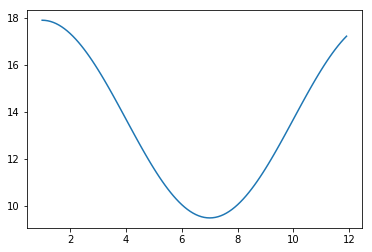

In [3]:
%matplotlib inline
from matplotlib import pylab as plt

x_0 = np.arange(1, 12, 0.1)
y_0 = list(map(f, x_0))
plt.plot(x_0, y_0)
plt.show()

In [4]:
x1, x2 = 1, 12
a = np.array([[1, x1], [1, x2]])
b = np.array([f(x1), f(x2)])
x_1 = np.linalg.solve(a, b)
print(x_1)

[17.95115394 -0.05115394]


In [5]:
def f_1(x):
    return x_1[0] + x_1[1]*x

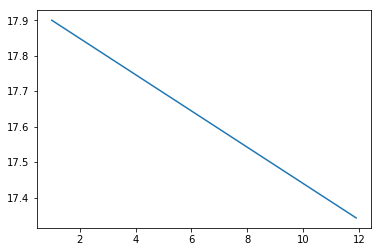

In [6]:
y_1 = list(map(f_1, x_0))
plt.plot(x_0, y_1)
plt.show()

In [7]:
x1, x2, x3 = 1, 7, 12
a = np.array([[1, x1, x1**2], [1, x2, x2**2], [1, x3, x3**2]])
b = np.array([f(x1), f(x2), f(x3)])
x_2 = np.linalg.solve(a, b)
print(x_2)

[21.18838449 -3.5581537   0.26976921]


In [8]:
def f_2(x):
    return x_2[0] + x_2[1]*x + x_2[2]*(x**2)

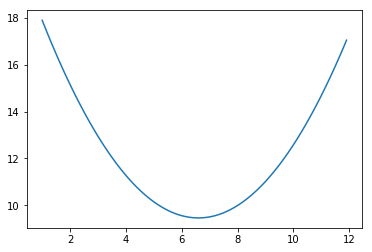

In [9]:
y_2 = list(map(f_2, x_0))
plt.plot(x_0, y_2)
plt.show()

In [10]:
x1, x2, x3, x4 = 1, 2, 7, 12
a = np.array([[1, x1, x1**2, x1**3], [1, x2, x2**2, x2**3], [1, x3, x3**2, x3**3], [1, x4, x4**2, x4**3]])
b = np.array([f(x1), f(x2), f(x3), f(x4)])
x_3 = np.linalg.solve(a, b)
print(x_3)

[17.51564785  0.94532098 -0.60469189  0.04372306]


In [11]:
def f_3(x):
    return x_3[0] + x_3[1]*x + x_3[2]*(x**2) + x_3[3]*(x**3)

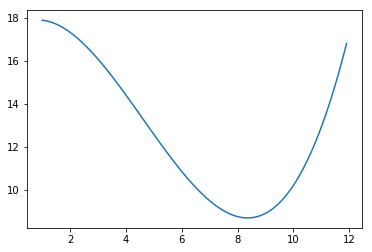

In [12]:
y_3 = list(map(f_3, x_0))
plt.plot(x_0, y_3)
plt.show()